In [3]:
!pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 42.6 MB/s eta 0:00:00


In [4]:
import cv2
import numpy as np
import os
import mediapipe as mp
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
model_1 = load_model('/content/B_Model_50epochs_acc_097.hdf5')
model_2 = load_model('/content/Versuch2_B_Model_100epochs_acc_0995.hdf5')
model_3 = load_model('/content/Versuch3_B_Model_100epochs_lstm_acc_0980.hdf5')

In [ ]:
gestures = ['faust', 'peace', 'thumb-up', 'thumb-down', 'open-hand', 'telefon']
image_folder = '/content/validationimages'

In [ ]:
# init MediaPipe
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5)

In [10]:
y_true = []
y_pred_1 = []
y_pred_2 = []
y_pred_3 = []

for filename in os.listdir(image_folder):
    image_path = os.path.join(image_folder, filename)
    frame = cv2.imread(image_path)

    if frame is None:
        print(f"Warnung: Konnte {filename} nicht laden.")
        continue

    # extract shown (true) gesture out of filename
    true_label = filename.split('_')[0].lower()

    if true_label not in gestures:
        print(f"Warnung: Unbekannte Geste in Dateiname {filename}. Überspringe Bild.")
        continue

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(frame_rgb)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            landmarks = []
            for lm in hand_landmarks.landmark:
                landmarks.extend([lm.x, lm.y, lm.z])

            landmarks = np.array(landmarks).reshape(1, 63, 1)

            prediction_1 = model_1.predict(landmarks)
            prediction_2 = model_2.predict(landmarks)
            prediction_3 = model_3.predict(landmarks)

            gesture_index_1 = np.argmax(prediction_1)
            gesture_index_2 = np.argmax(prediction_2)
            gesture_index_3 = np.argmax(prediction_3)

            predicted_label_1 = gestures[gesture_index_1]
            predicted_label_2 = gestures[gesture_index_2]
            predicted_label_3 = gestures[gesture_index_3]

            y_true.append(true_label)
            y_pred_1.append(predicted_label_1)
            y_pred_2.append(predicted_label_2)
            y_pred_3.append(predicted_label_3)

            print(f"Bild {filename}: Wahre Geste = {true_label}")
            print(f"  - Modell 1: {predicted_label_1}")
            print(f"  - Modell 2: {predicted_label_2}")
            print(f"  - Modell 3: {predicted_label_3}\n")

    else:
        print(f"Keine Hand erkannt in {filename}.")


print("\n### AUSWERTUNG ###\n")
print("Modell 1 - Genauigkeit:", accuracy_score(y_true, y_pred_1))
print("Modell 2 - Genauigkeit:", accuracy_score(y_true, y_pred_2))
print("Modell 3 - Genauigkeit:", accuracy_score(y_true, y_pred_3))

print("\nModell 1 - Detaillierter Report:\n", classification_report(y_true, y_pred_1, target_names=gestures))
print("\nModell 2 - Detaillierter Report:\n", classification_report(y_true, y_pred_2, target_names=gestures))
print("\nModell 3 - Detaillierter Report:\n", classification_report(y_true, y_pred_3, target_names=gestures))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Bild thumb-up_1.jpg: Wahre Geste = thumb-up
  - Modell 1: thumb-up
  - Modell 2: thumb-up
  - Modell 3: thumb-up

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Bild open-hand_1.jpg: Wahre Geste = open-hand
  - Modell 1: open-hand
  - Modell 2: open-hand
  - Modell 3: open-hand

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Bild thumb-down_1.jpg: Wahre Geste = thumb-down
  - Modell 1: thumb-up
  - Modell 2: thumb-down
  - Modell 3: faust

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Bild faust_1.jpg: Wahre Geste = faust
  - Modell 1: faust
  - Modell 2: faust
  - Modell 3: faust

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

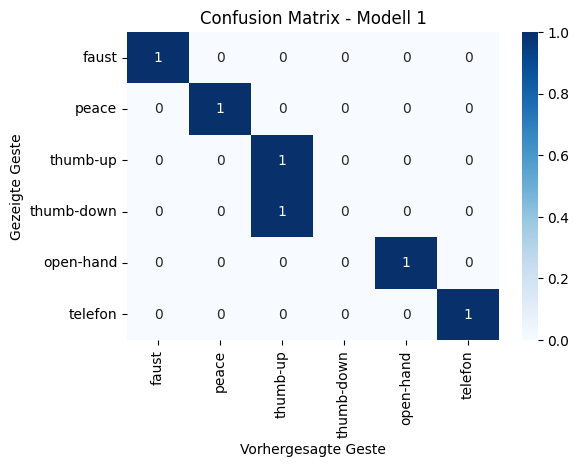

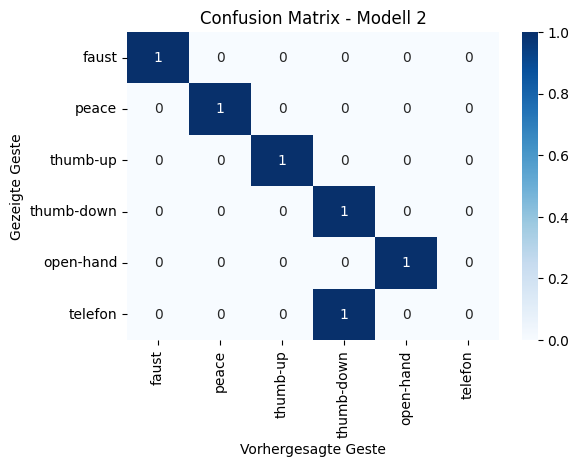

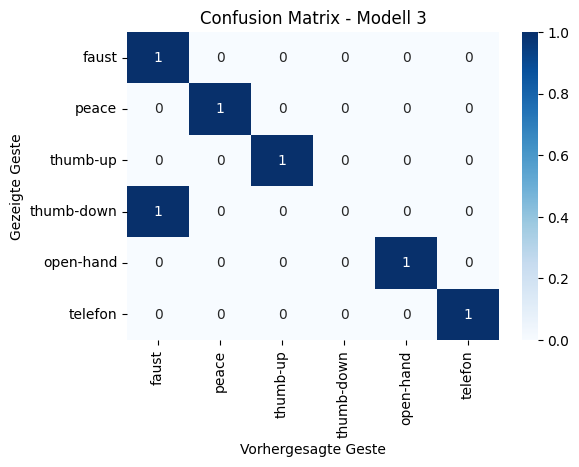

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred, labels=gestures)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=gestures, yticklabels=gestures)
    plt.xlabel("Vorhergesagte Geste")
    plt.ylabel("Gezeigte Geste")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

plot_confusion_matrix(y_true, y_pred_1, "Modell 1")
plot_confusion_matrix(y_true, y_pred_2, "Modell 2")
plot_confusion_matrix(y_true, y_pred_3, "Modell 3")
